In [1]:
import pandas as pd
from sklearn import metrics
import glob
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import random

<h3>Loading Dataset</h3>

In [2]:
path = '../Dataset/Train/'
train_data = pd.read_csv(path+'balanced_2_class_over_undersampled_train.csv')
train_data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,6.715501,1209.0,12.1,100.5,12.843083,12.843083,0.0,0.0,0.0,0.0,...,44.320532,95.4,1.665202e+08,13.5,14.621806,62.742005,1970.908307,1.0,244.6,0
1,73.462012,44535.2,7.7,191.0,22.985479,22.985479,0.0,0.0,0.0,0.0,...,27.691995,98.8,6.047893e-03,5.5,13.538316,39.162395,1052.691326,0.9,38.5,0
2,60.069321,55779.3,8.8,121.7,6.172632,6.172632,0.0,0.0,0.0,0.0,...,79.439417,184.1,1.706760e-02,5.5,16.367950,112.344300,8626.834264,0.9,38.5,0
3,35.767762,2636791.0,6.0,231.0,72.257795,72.257795,0.0,0.0,0.0,0.0,...,0.000000,66.0,1.686502e-03,5.5,11.489125,0.000000,0.000000,0.0,38.5,0
4,32.251696,32869.8,10.4,90.0,14.555923,14.555923,0.0,0.0,0.0,0.0,...,17.984090,78.4,1.110640e-02,5.5,11.644900,25.433343,444.826374,0.8,38.5,0


In [4]:
train_data['label'].value_counts()

label
1    2000000
0    1000000
Name: count, dtype: int64

In [3]:
path = '../Dataset/Test/'
test_data = pd.read_csv(path+'testing_2.csv')
test_data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,1.743276,1.743276,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312888e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
1,3.709134,3973168.90,16.61,65.04,1856.581305,1856.581305,0.0,0.0,0.0,0.0,...,62.831747,539.08,8.371155e+07,9.5,32.385592,88.943645,11193.731860,0.37,141.55,1
2,0.000000,54.00,6.00,64.00,2.848676,2.848676,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309440e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
3,0.000000,53.46,5.95,64.00,10.788210,10.788210,0.0,0.0,1.0,0.0,...,0.398463,54.44,8.336548e+07,9.5,10.401502,0.566842,4.018273,0.04,141.55,1
4,0.071602,19.94,1.09,65.05,2.096381,2.096381,0.0,0.0,0.0,0.0,...,3.878586,43.33,8.312837e+07,9.5,9.316268,5.492694,109.917888,0.14,141.55,1


In [5]:
test_data['label'].value_counts()

label
1    9117568
0     219748
Name: count, dtype: int64

<h3>Train and Test split</h3>

In [6]:
# feature_cols = data.columns.to_list()[:-1]
# X = data[feature_cols] #Features
# y = data.label #target

In [7]:
# X_train,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h3>Data Preprocessing</h2>

In [4]:
X_train = train_data.drop(columns='label',axis=1).to_numpy()
X_test = test_data.drop(columns='label',axis=1).to_numpy()

<h2>Using D-Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier(max_depth=33,class_weight='balanced')

clf.fit(X_train,train_data['label'])

DecisionTreeClassifier(class_weight='balanced', max_depth=23)

In [41]:
predicted = clf.predict(X_test)

In [42]:
print(metrics.accuracy_score(test_data['label'], predicted))
print(classification_report(test_data['label'], predicted))

0.9954098158400123
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    219748
           1       1.00      1.00      1.00   9117568

    accuracy                           1.00   9337316
   macro avg       0.92      1.00      0.95   9337316
weighted avg       1.00      1.00      1.00   9337316



In [43]:
print(metrics.accuracy_score(test_data['label'], predicted))
print(metrics.precision_score(test_data['label'], predicted, average='weighted'))
print(metrics.recall_score(test_data['label'], predicted, average='weighted'))
print(metrics.f1_score(test_data['label'], predicted, average='weighted'))

0.9954098158400123
0.9961472901710424
0.9954098158400123
0.9956062505571297


In [38]:
print(metrics.precision_score(test_data['label'], predicted, average='macro'))
print(metrics.recall_score(test_data['label'], predicted, average='macro'))
print(metrics.f1_score(test_data['label'], predicted, average='macro'))

0.782210858642894
0.9893605892927348
0.8557610989693987


In [39]:
print(metrics.precision_score(test_data['label'], predicted, average='micro'))
print(metrics.recall_score(test_data['label'], predicted, average='micro'))
print(metrics.f1_score(test_data['label'], predicted, average='micro'))

0.9818281827454485
0.9818281827454485
0.9818281827454485


In [44]:
cm = metrics.confusion_matrix(test_data['label'], predicted)

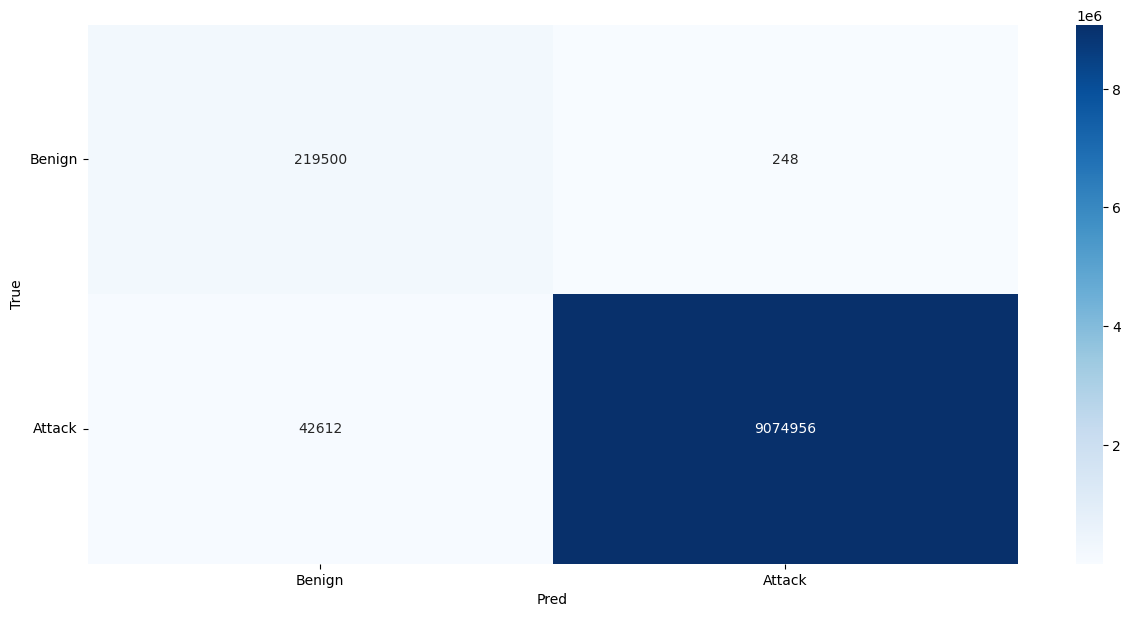

In [45]:
## Plot confusion matrix
unique_classes = ['Benign','Attack']
fig, ax = plt.subplots()
sn.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=True)
ax.set(xlabel="Pred", ylabel="True", xticklabels=unique_classes,
       yticklabels=unique_classes)
plt.rcParams["figure.figsize"] = (12,5)
plt.yticks(rotation=0)
plt.show()

In [15]:
# Get predicted probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:,1]

# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(test_data['label'], y_prob)
print(f'Brier score (binary): {brier_score_pos:.4f}')

Brier score (binary): 0.0039


In [5]:
import xgboost

In [6]:
unique_classes = ['Benign','Attack']

In [7]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [18]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [8]:
# from sklearn.utils import class_weight
# classes_weights = list(class_weight.compute_class_weight('balanced',
#                                              classes=np.unique(y_train),
#                                              y=y_train))

# weights = np.ones(y_train.shape[0], dtype = 'float')

In [9]:
# param_dist = {

# 'learning_rate': [0.25, 0.7, 1],

# 'max_depth': [21, 27, 33],

# 'n_estimators': [150, 200, 300],

# 'colsample_bytree': [0.3, 0.5, 0.7],

# 'subsample': [0.5,0.8, 1.0]
# }

In [10]:
# xgb_classifier = xgboost.XGBClassifier(verbosity=2,objective='binary:logistic')

In [11]:
# from sklearn.model_selection import RandomizedSearchCV

# random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, scoring='accuracy', n_iter=10, cv=3, verbose=2)
# random_search.fit(X_train, y_train)

In [12]:
# print("Best Hyperparameters:", random_search.best_params_)

In [8]:
xgb_classifier = xgboost.XGBClassifier(objective='binary:logistic', verbosity=2, n_estimators=1000, max_depth= 33, eta=1)

In [9]:
xgb_model = xgb_classifier.fit(X_train, y_train)
xgb_predicted_values = xgb_model.predict(X_test)

In [98]:
print(classification_report(y_test , xgb_predicted_values,target_names=unique_classes))

              precision    recall  f1-score   support

      Benign       0.85      1.00      0.92    219748
      Attack       1.00      1.00      1.00   9117568

    accuracy                           1.00   9337316
   macro avg       0.92      1.00      0.96   9337316
weighted avg       1.00      1.00      1.00   9337316



In [15]:
print(metrics.accuracy_score(y_test, xgb_predicted_values))
print(metrics.precision_score(y_test, xgb_predicted_values, average='weighted'))
print(metrics.recall_score(y_test, xgb_predicted_values, average='weighted'))
print(metrics.f1_score(y_test, xgb_predicted_values, average='weighted'))

0.9957648429163156
0.9963891197231627
0.9957648429163156
0.9959311871858234


In [16]:
xgb_cm = metrics.confusion_matrix(y_test, xgb_predicted_values)

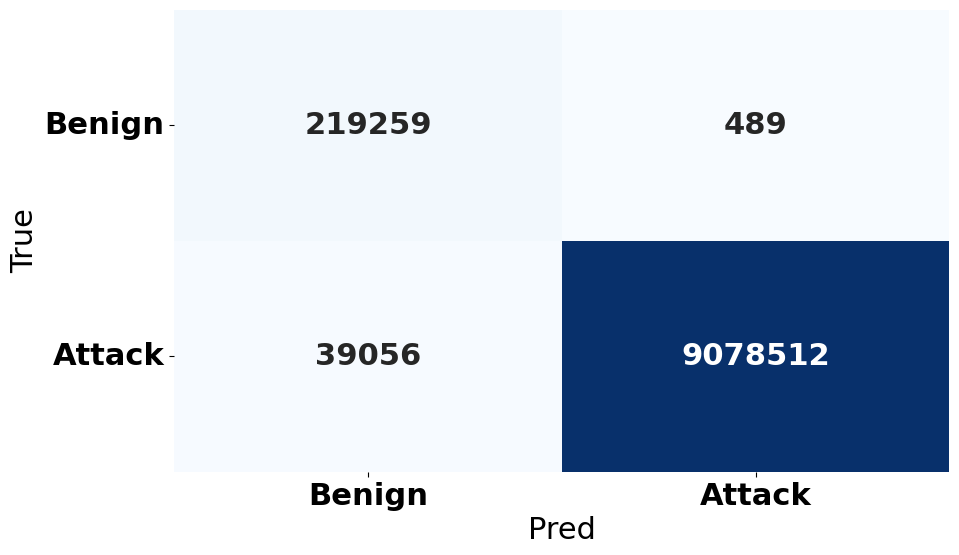

In [54]:
fig, ax = plt.subplots()
sn.heatmap(xgb_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=unique_classes,
       yticklabels=unique_classes)
plt.rcParams["figure.figsize"] = (10,6)
plt.yticks(rotation=0)
plt.rcParams.update({'font.size': 22,'font.weight':'bold'})
plt.show()

In [25]:
# Get predicted probabilities for the positive class
y_prob = xgb_model.predict_proba(X_test)[:,1]

# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(test_data['label'], y_prob)
print(f'Brier score (binary): {brier_score_pos:.4f}')

Brier score (binary): 0.0039


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_clf = RandomForestClassifier(max_depth=33, n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=33, random_state=42)

In [33]:
rf_y_pred = rf_clf.predict(X_test)

In [38]:
print(classification_report(y_test , rf_y_pred,target_names=unique_classes))

              precision    recall  f1-score   support

      Benign       0.84      1.00      0.91    219748
      Attack       1.00      1.00      1.00   9117568

    accuracy                           1.00   9337316
   macro avg       0.92      1.00      0.96   9337316
weighted avg       1.00      1.00      1.00   9337316



In [34]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, rf_y_pred)
precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
f1 = metrics.f1_score(y_test, rf_y_pred, average='weighted')

In [35]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.995610623009867
Precision: 0.9962965782466939
Recall: 0.995610623009867
F1 Score: 0.9957921716147657


In [36]:
rf_cm = metrics.confusion_matrix(y_test, rf_y_pred)

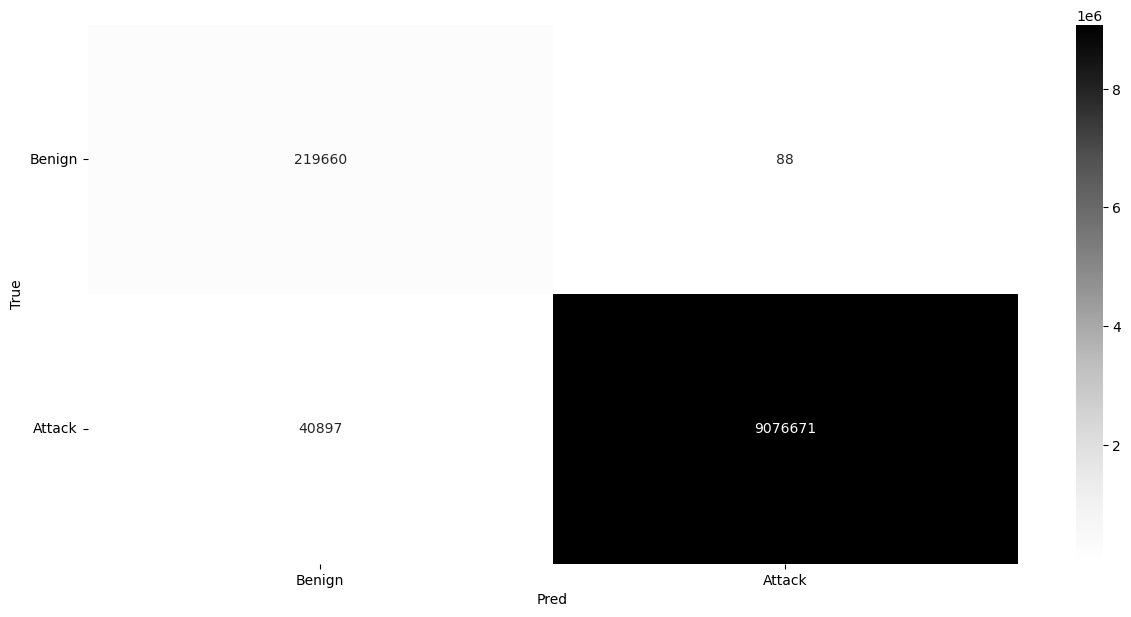

In [37]:
## Plot confusion matrix
fig, ax = plt.subplots()
sn.heatmap(rf_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Greys,
            cbar=True)
ax.set(xlabel="Pred", ylabel="True", xticklabels=unique_classes,
       yticklabels=unique_classes)
plt.rcParams["figure.figsize"] = (15,7)
plt.yticks(rotation=0)
plt.show()

In [39]:
# Calculate multiclass Brier score
y_prob = rf_clf.predict_proba(X_test)[:,1]
# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(y_test, y_prob)
print(f'Brier score (binary): {brier_score_pos:.4f}')

Brier score (binary): 0.0035


In [11]:
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})

In [96]:
def plot_frequency_bar_graph(data, num_bins):
    """
    Plots a frequency bar graph with the specified number of ranges (bins) for a given list of data.
    
    Parameters:
    data (list): The list of data points.
    num_bins (int): The number of bins (ranges) to divide the data into.
    """
    # Calculate the bin edges
    bin_edges = np.linspace(min(data), max(data), num_bins + 1)

    # Calculate the frequency of data points in each bin
    hist, bin_edges = np.histogram(data, bins=bin_edges)

    # Plot the bar graph
    plt.bar(range(num_bins), hist, width=0.8, align='center')

    # Set the x-axis labels to represent the ranges
    bin_labels = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(num_bins)]
    print(hist)
    plt.xticks(range(num_bins), bin_labels, rotation=45)

    # Add labels and title
    plt.xlabel('Raw Prediction Value Ranges',fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    # plt.title('Frequency Distribution')

    # Show the plot
    plt.show()

In [63]:
import shap
import statistics

In [12]:
tp_instances = np.where((y_test == 1) & (xgb_predicted_values == 1))[0]
tn_instances = np.where((y_test == 0) & (xgb_predicted_values == 0))[0]
fp_instances = np.where((y_test == 0) & (xgb_predicted_values == 1))[0]
fn_instances = np.where((y_test == 1) & (xgb_predicted_values == 0))[0]

In [57]:
# Calculate multiclass Brier score TP
y_prob = xgb_model.predict_proba(X_test)[:,1]

Brier score (binary): 0.0000


array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

Brier score (binary): 0.0000
1.0 0.50011414 0.0070312256 1.0 1.0
[    450     491     515     529     573     678     780    1091    1693
 9071712]


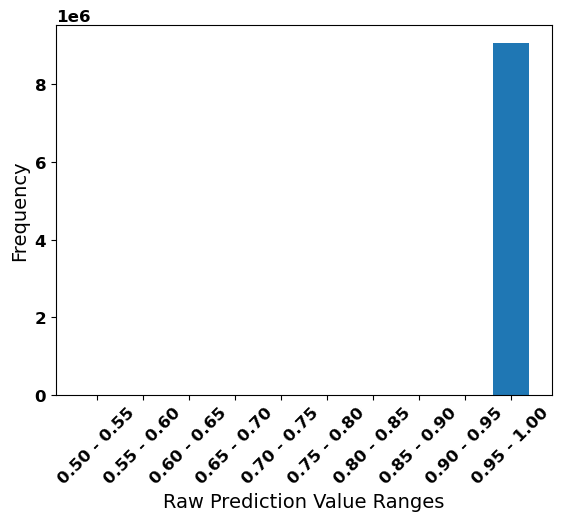

In [97]:
# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(y_test[tp_instances], y_prob[tp_instances])
print(f'Brier score (binary): {brier_score_pos:.4f}')
print(max(y_prob[tp_instances]),min(y_prob[tp_instances]),np.std(y_prob[tp_instances],ddof=1),statistics.median(y_prob[tp_instances]),statistics.mode(y_prob[tp_instances]))
plot_frequency_bar_graph(y_prob[tp_instances], 10)

Brier score (binary): 0.0002
0.4976913 1.5291007e-13 0.01439961 2.366576e-08 4.9944298e-09
[218383    299    154     93     83     60     50     52     37     48]


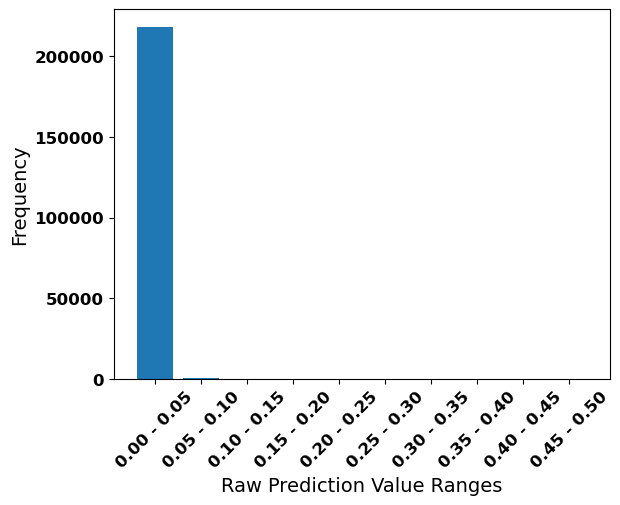

In [98]:
# Calculate multiclass Brier score TN
# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(y_test[tn_instances], y_prob[tn_instances])
print(f'Brier score (binary): {brier_score_pos:.4f}')
print(max(y_prob[tn_instances]),min(y_prob[tn_instances]),np.std(y_prob[tn_instances],ddof=1),statistics.median(y_prob[tn_instances]),statistics.mode(y_prob[tn_instances]))
plot_frequency_bar_graph(y_prob[tn_instances], 10)

Brier score (binary): 0.6922
0.9999989 0.5007977 0.16317049 0.85929155 0.79594505
[ 32  44  41  30  22  35  36  39  53 157]


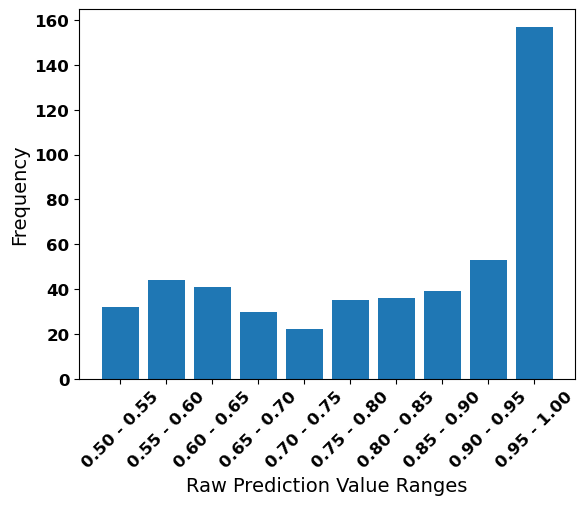

In [99]:
# Calculate multiclass Brier score FP
# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(y_test[fp_instances], y_prob[fp_instances])
print(f'Brier score (binary): {brier_score_pos:.4f}')
print(max(y_prob[fp_instances]),min(y_prob[fp_instances]),np.std(y_prob[fp_instances],ddof=1),statistics.median(y_prob[fp_instances]),statistics.mode(y_prob[fp_instances]))
plot_frequency_bar_graph(y_prob[fp_instances], 10)

Brier score (binary): 0.9228
0.49999374 2.878475e-11 0.10154343 0.0006513380794785917 0.00799013
[31610  1934  1186   858   720   674   548   535   498   493]


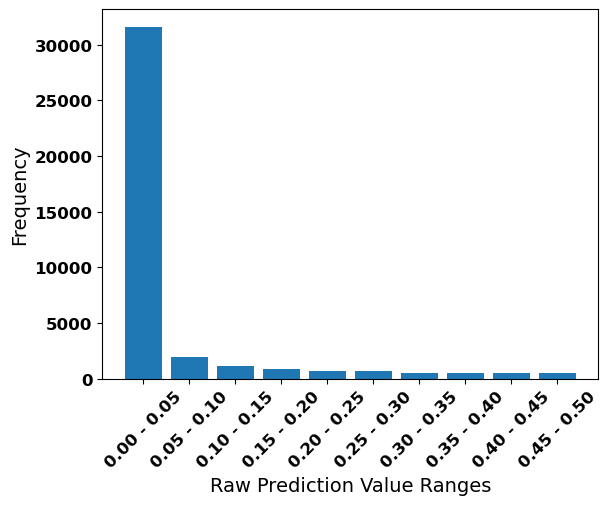

In [100]:
# Calculate multiclass Brier score TN
# Calculate Brier score for binary classification
brier_score_pos = metrics.brier_score_loss(y_test[fn_instances], y_prob[fn_instances])
print(f'Brier score (binary): {brier_score_pos:.4f}')
print(max(y_prob[fn_instances]),min(y_prob[fn_instances]),np.std(y_prob[fn_instances],ddof=1),statistics.median(y_prob[fn_instances]),statistics.mode(y_prob[fn_instances]))
plot_frequency_bar_graph(y_prob[fn_instances], 10)

In [56]:
y_test[fn_instances]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
y_prob[fn_instances]

array([7.1569713e-04, 3.2452521e-05, 2.5763717e-01, ..., 1.6842943e-05,
       7.6774165e-02, 4.2163738e-04], dtype=float32)

In [13]:
print(len(tp_instances),len(tn_instances),len(fp_instances),len(fn_instances))

9078512 219259 489 39056


In [14]:
rng = np.random.default_rng()

In [15]:
##TP explainer
tp_explainer = shap.TreeExplainer(xgb_classifier)
tp_shap_values = tp_explainer(rng.choice(X_test[tp_instances], 10000),check_additivity=False)

[14:01:30] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [14]:
tp_shap_values.shape

(10000, 46)

In [16]:
tp_shap_values.feature_names = train_data.columns[:-1]

In [17]:
shap.plots.force(tp_shap_values[0:1000])
p = shap.plots.force(tp_shap_values[0:1000])
shap.save_html('2_TP_force_plot.html', p)

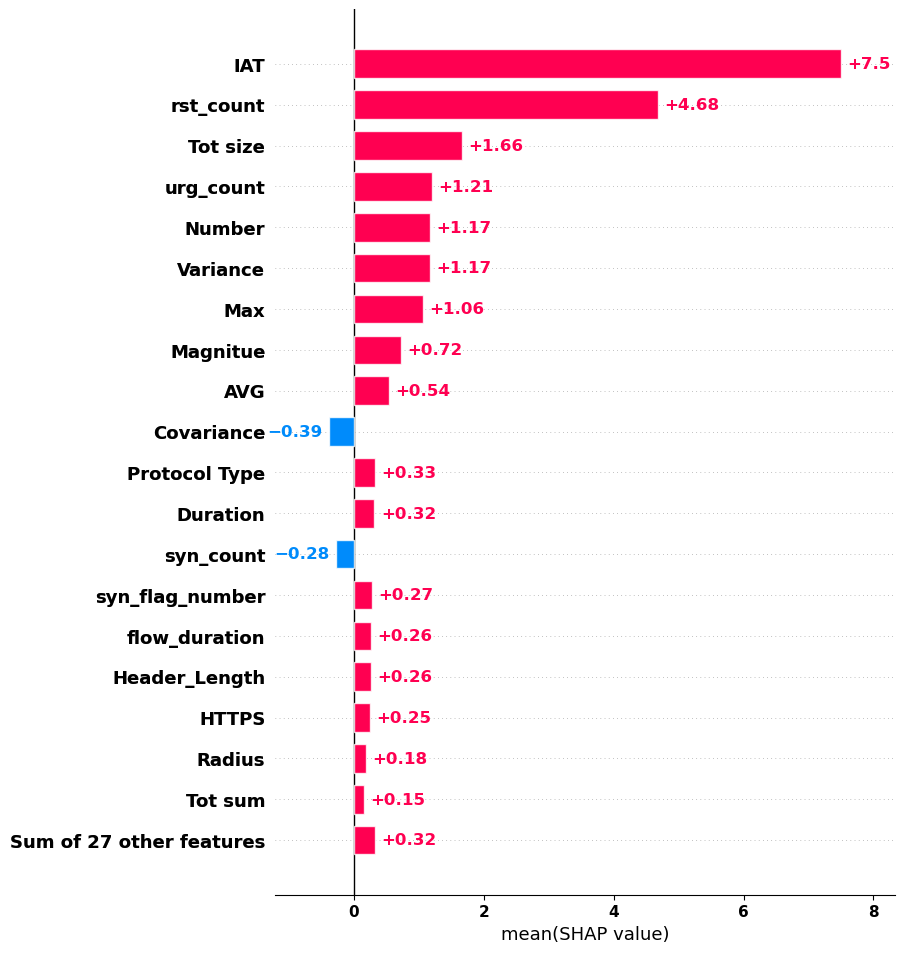

In [17]:
shap.plots.bar(tp_shap_values.mean(0),max_display=20)

2180


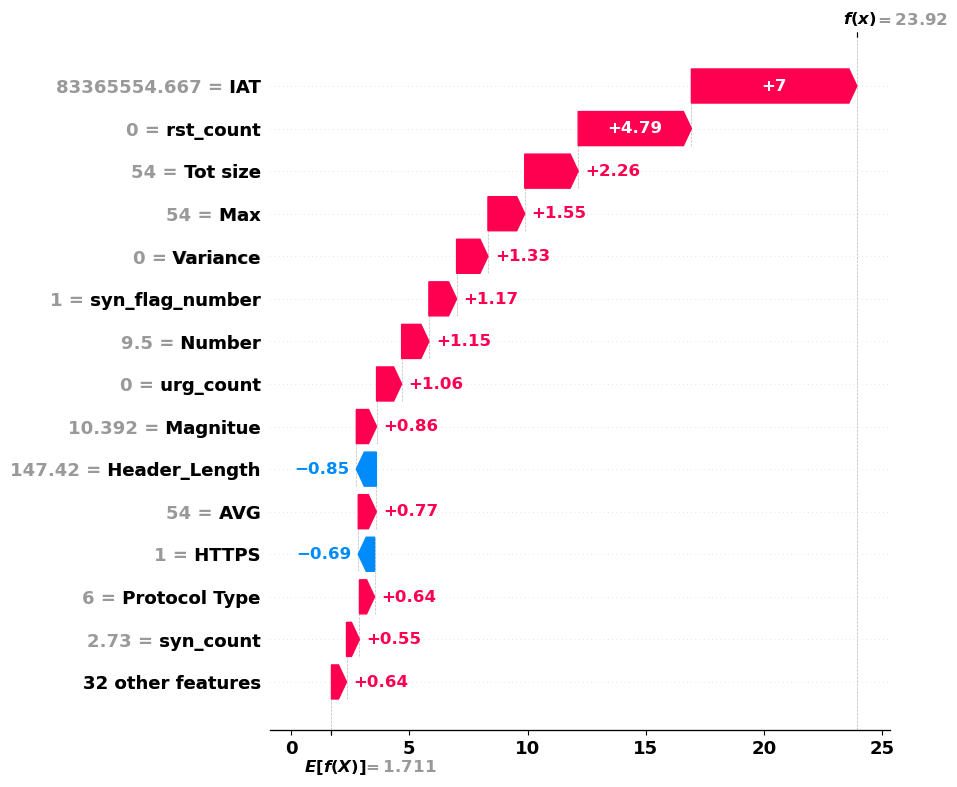

In [21]:
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tp_shap_values[1587],max_display=15)

306


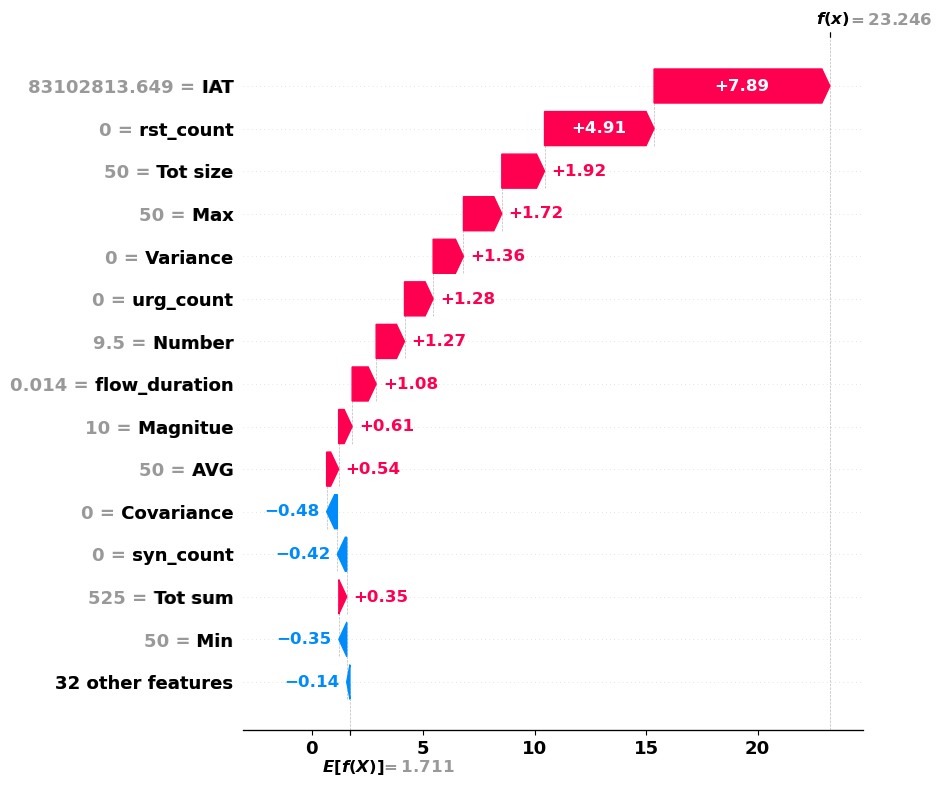

In [22]:
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tp_shap_values[1962],max_display=15)

9935


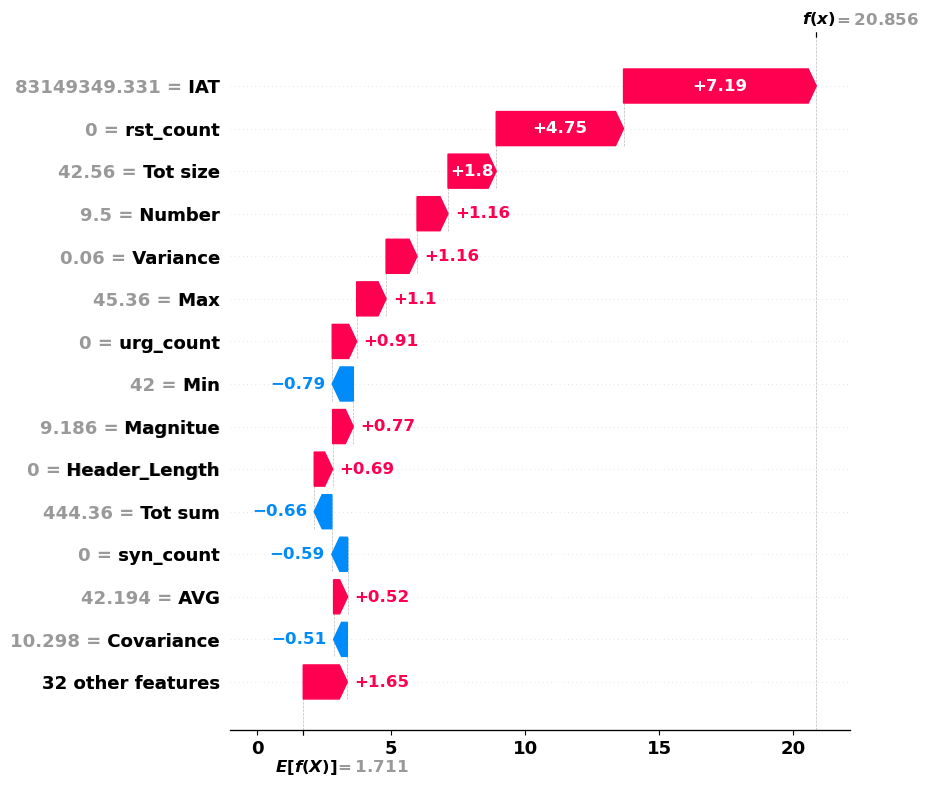

In [23]:
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tp_shap_values[9065],max_display=15)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


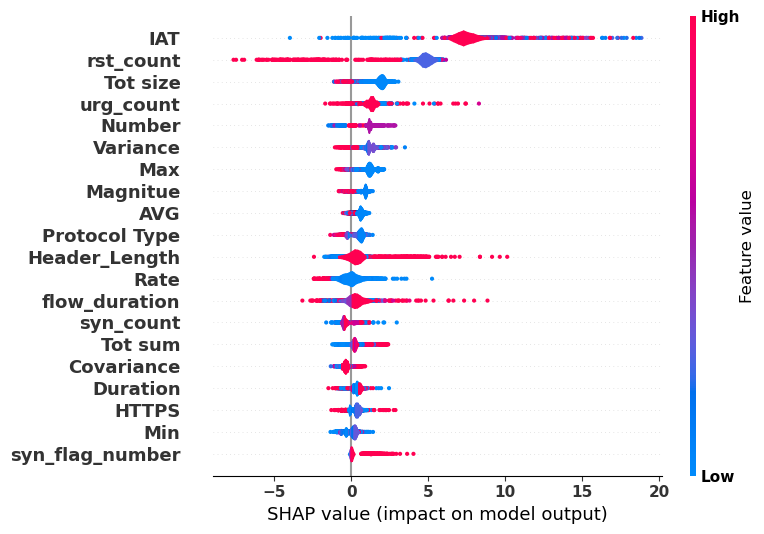

In [24]:
shap.summary_plot(tp_shap_values, plot_type="violin", class_names=unique_classes, plot_size=0.2,max_display=20)

In [25]:
##tn explainer
tn_explainer = shap.TreeExplainer(xgb_classifier)
tn_shap_values = tn_explainer(rng.choice(X_test[tn_instances], 10000),check_additivity=False)

[14:10:41] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [26]:
tn_shap_values.feature_names = train_data.columns[:-1]

In [30]:
shap.plots.force(tn_shap_values[0:1000])
p = shap.plots.force(tn_shap_values[0:1000])
shap.save_html('2_TN_force_plot.html', p)

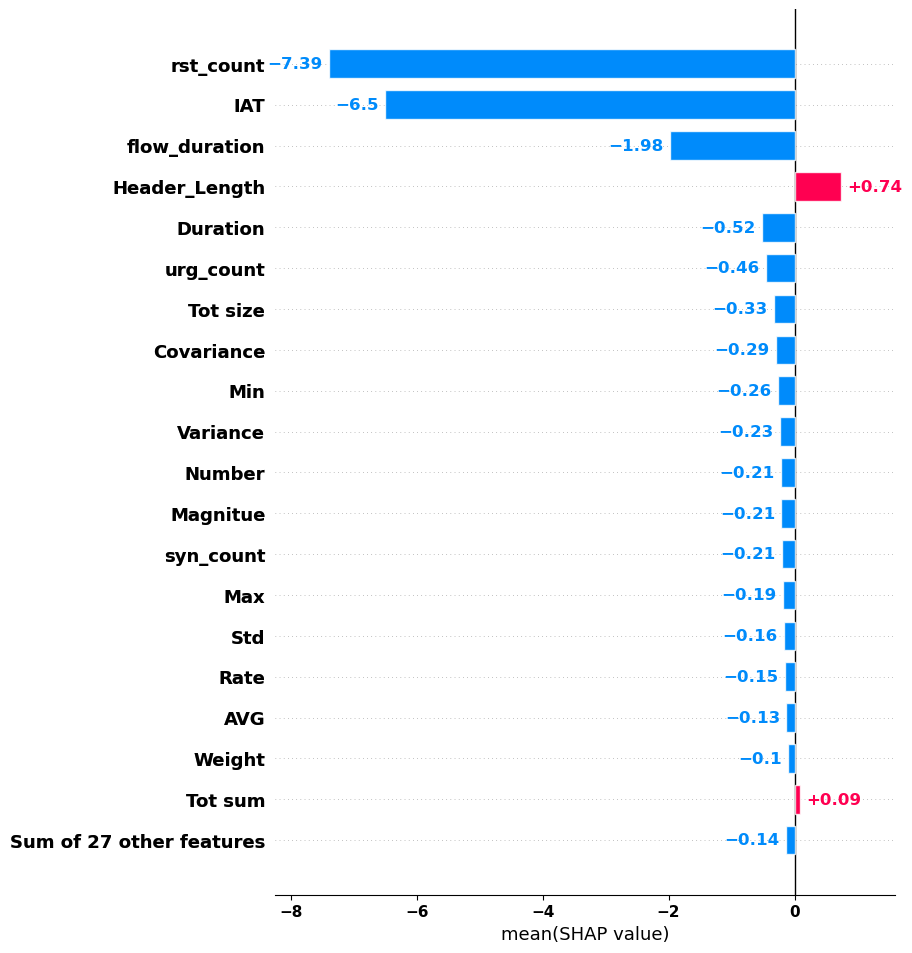

In [27]:
shap.plots.bar(tn_shap_values.mean(0),max_display=20)

9696


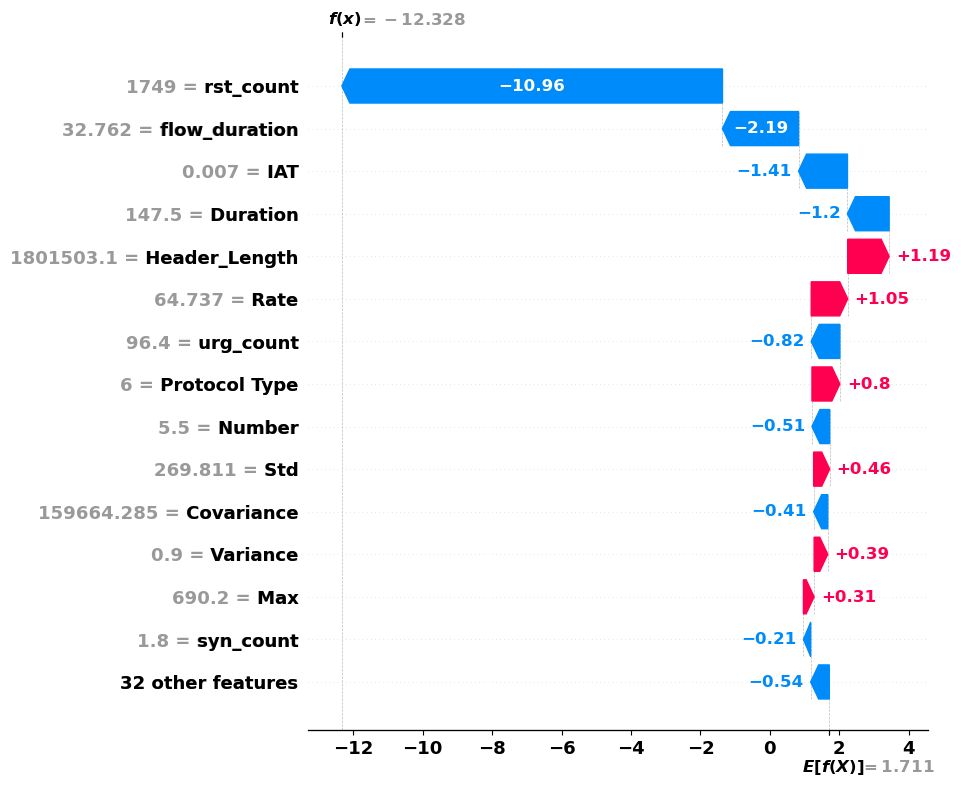

In [28]:
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tn_shap_values[9744],max_display=15)

3522


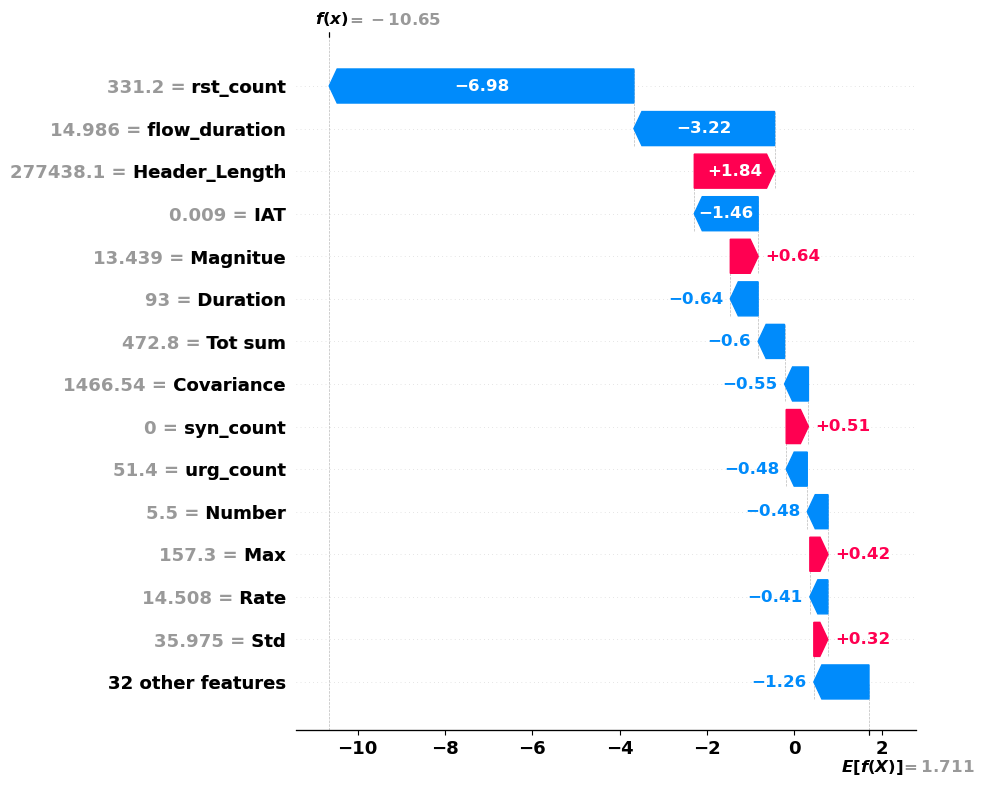

In [29]:
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tn_shap_values[8203],max_display=15)

9903


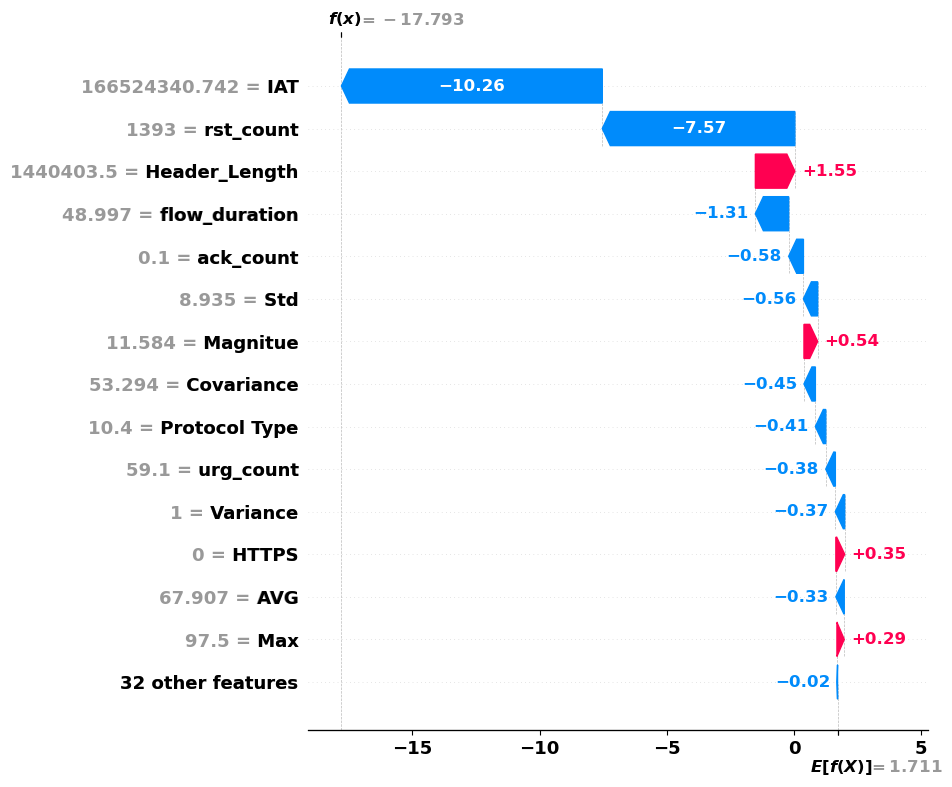

In [30]:
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tn_shap_values[3147],max_display=15)

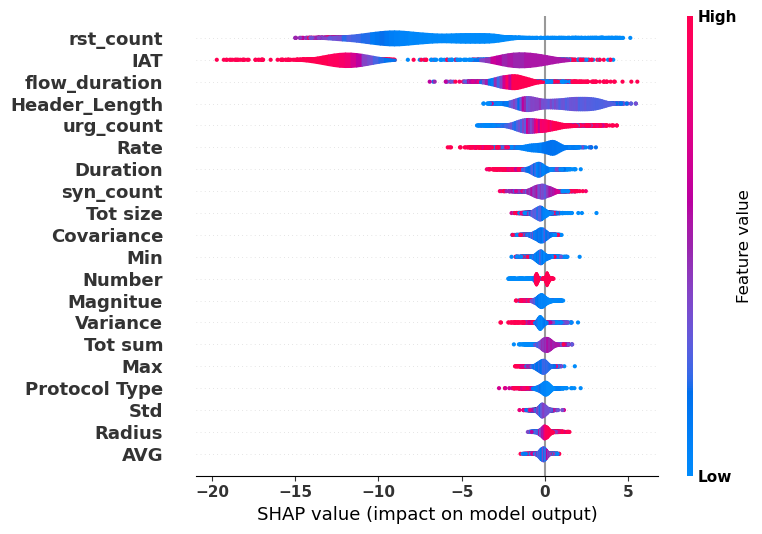

In [31]:
shap.summary_plot(tn_shap_values, plot_type="violin", class_names=unique_classes, plot_size=0.2)

In [32]:
##tn explainer
fp_explainer = shap.TreeExplainer(xgb_classifier)
fp_shap_values = fp_explainer(rng.choice(X_test[fp_instances], min(len(fp_instances),1000)),check_additivity=False)

[14:12:43] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [33]:
fp_shap_values.feature_names = train_data.columns[:-1]

In [16]:
shap.plots.force(fp_shap_values[0:500])
p = shap.plots.force(fp_shap_values[0:500])
shap.save_html('2_FP_force_plot.html', p)

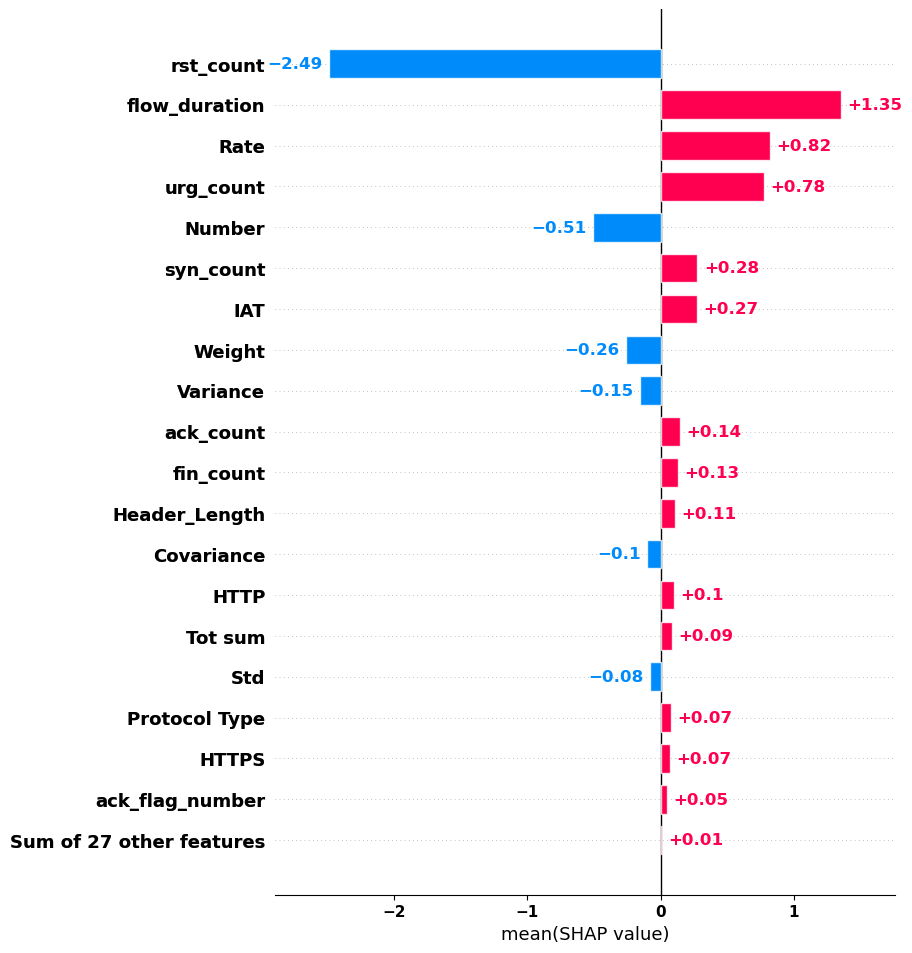

In [34]:
shap.plots.bar(fp_shap_values.mean(0),max_display=20)

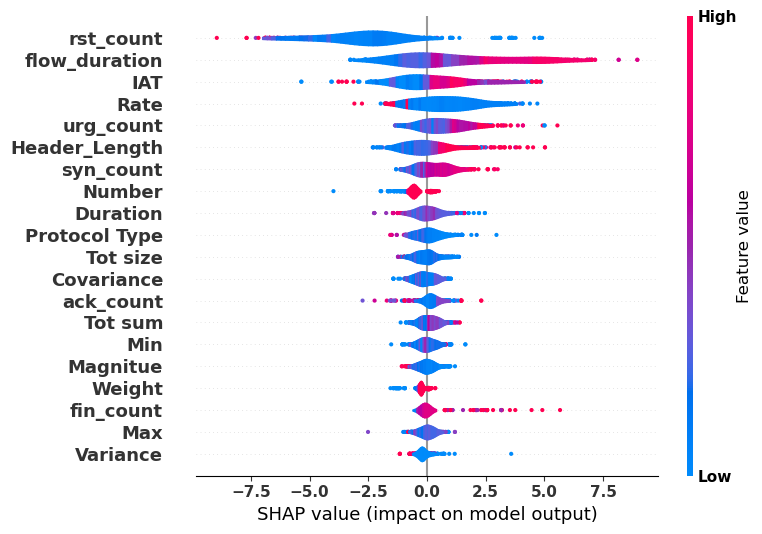

In [35]:
shap.summary_plot(fp_shap_values, plot_type="violin", class_names=unique_classes, plot_size=0.2)

476


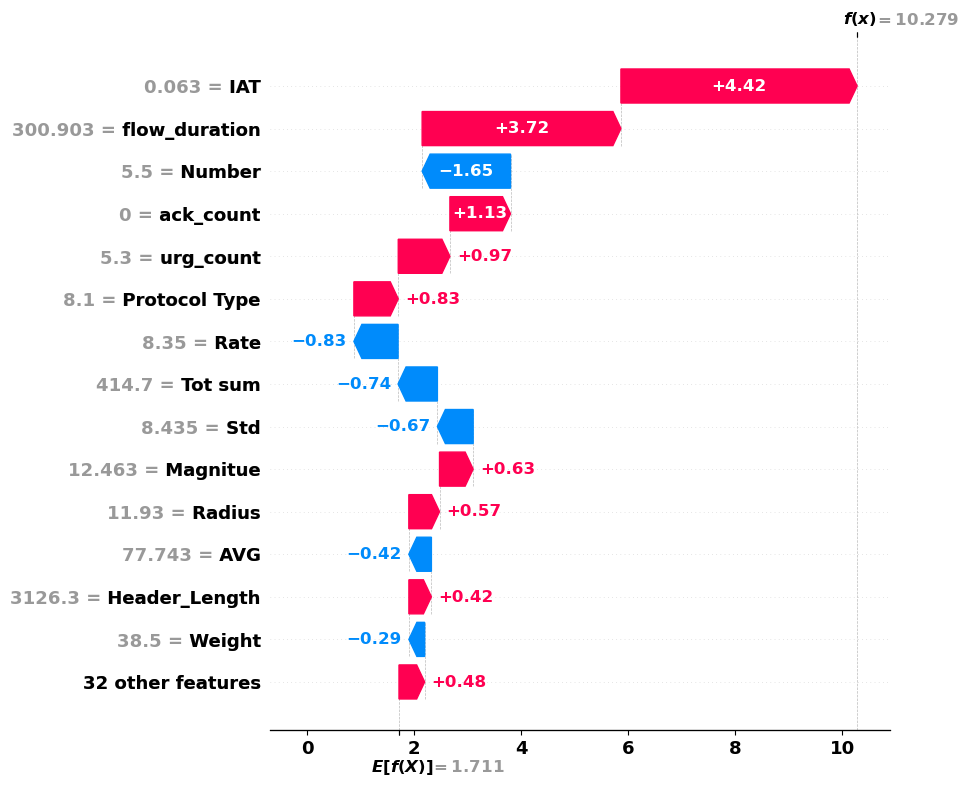

In [36]:
randi = random.randint(0,500)
print(randi)
shap.plots.waterfall(fp_shap_values[397],max_display=15)

254


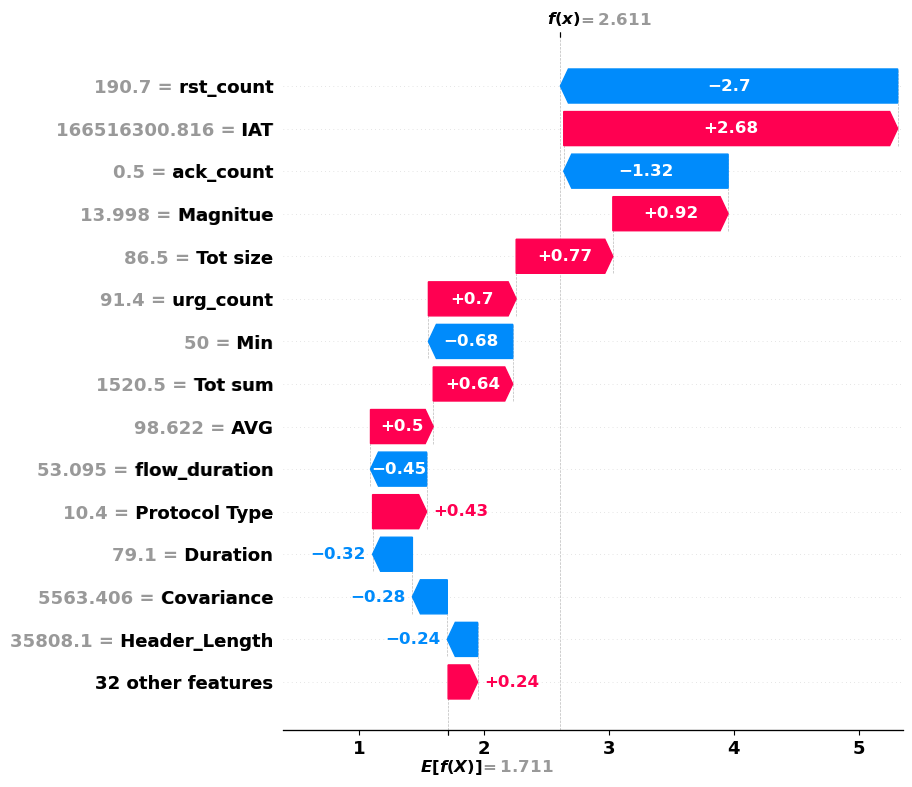

In [37]:
randi = random.randint(0,500)
print(randi)
shap.plots.waterfall(fp_shap_values[211],max_display=15)

67


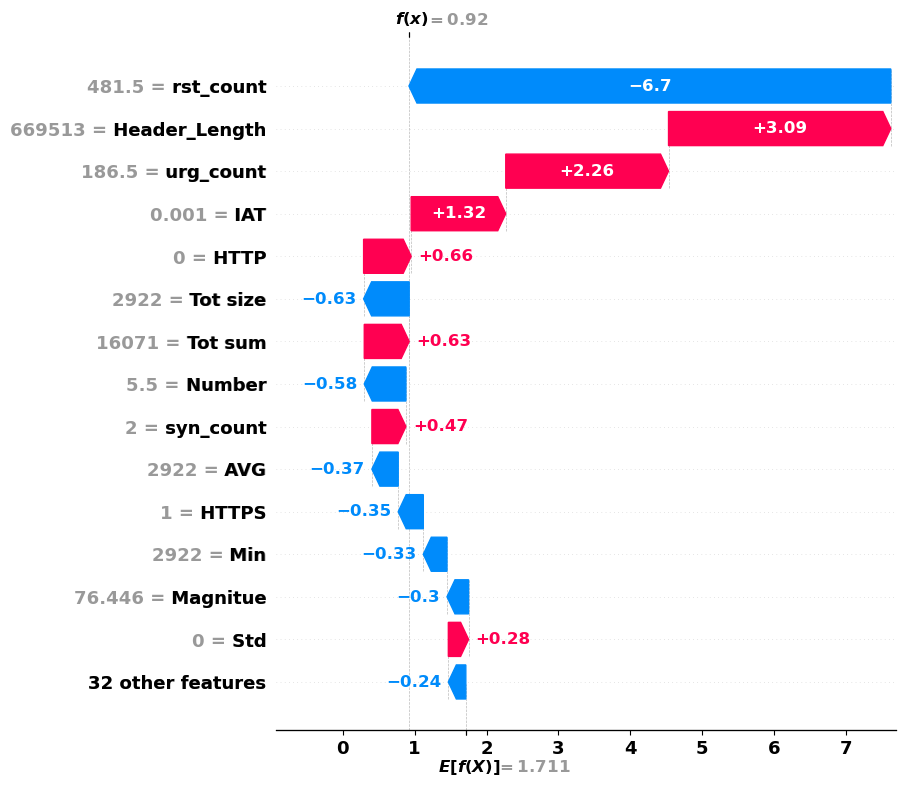

In [38]:
randi = random.randint(0,500)
print(randi)
shap.plots.waterfall(fp_shap_values[309],max_display=15)

In [39]:
##tn explainer
fn_explainer = shap.TreeExplainer(xgb_classifier)
fn_shap_values = fn_explainer(rng.choice(X_test[fn_instances], min(len(fn_instances),1000)),check_additivity=False)

[14:16:35] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [40]:
fn_shap_values.feature_names = train_data.columns[:-1]

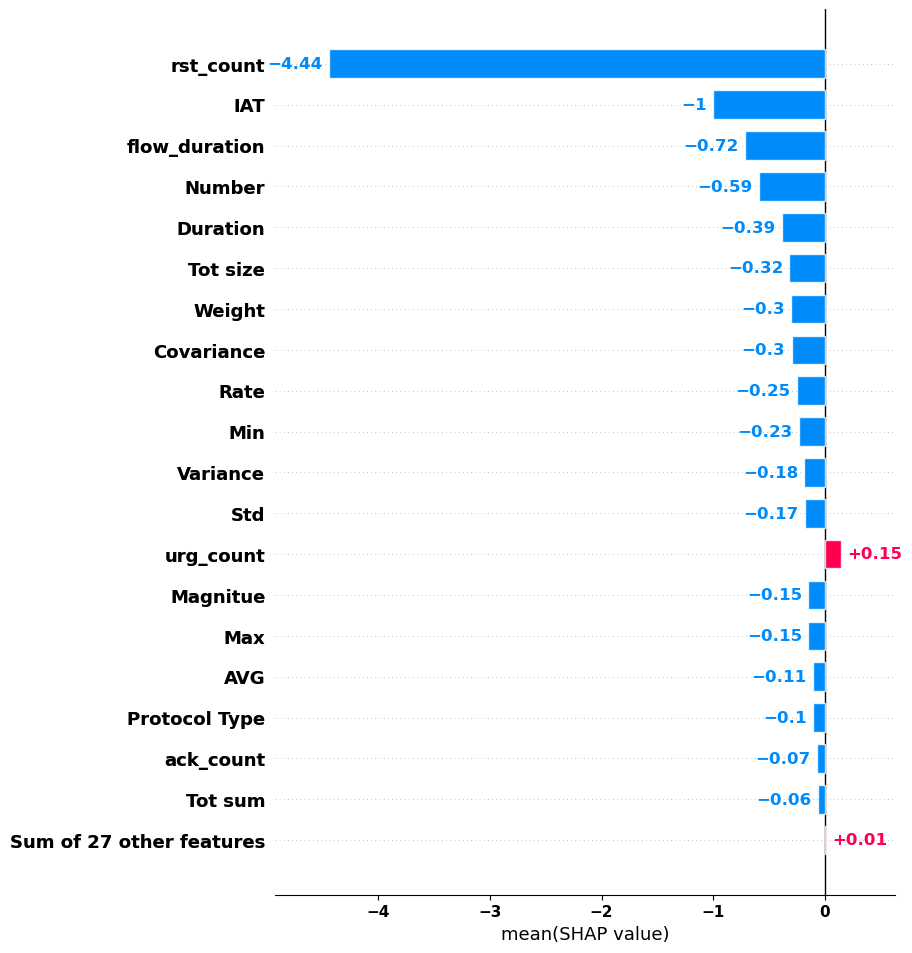

In [41]:
shap.plots.bar(fn_shap_values.mean(0),max_display=20)

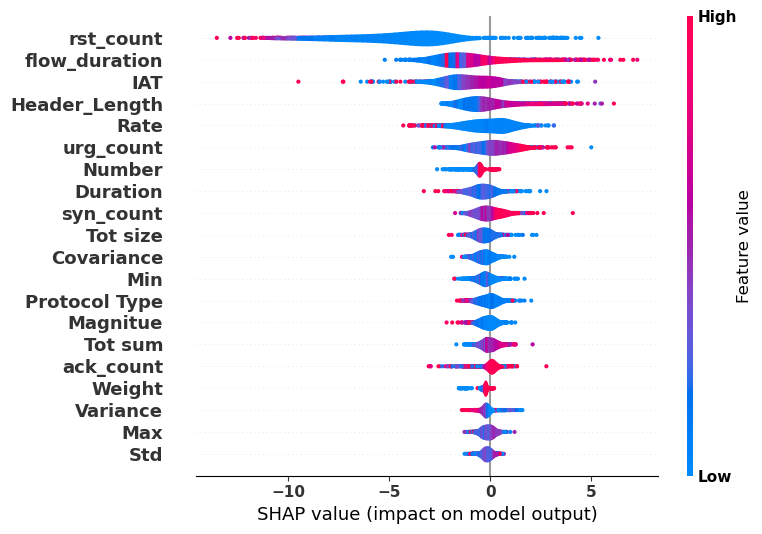

In [42]:
shap.summary_plot(fn_shap_values, plot_type="violin", class_names=unique_classes, plot_size=0.2)

In [26]:
shap.plots.initjs()
shap.force_plot(fn_shap_values[360])

In [27]:
shap.plots.force(fn_shap_values[0:500])
p = shap.plots.force(fn_shap_values[0:500])
shap.save_html('2_FN_force_plot.html', p)

208


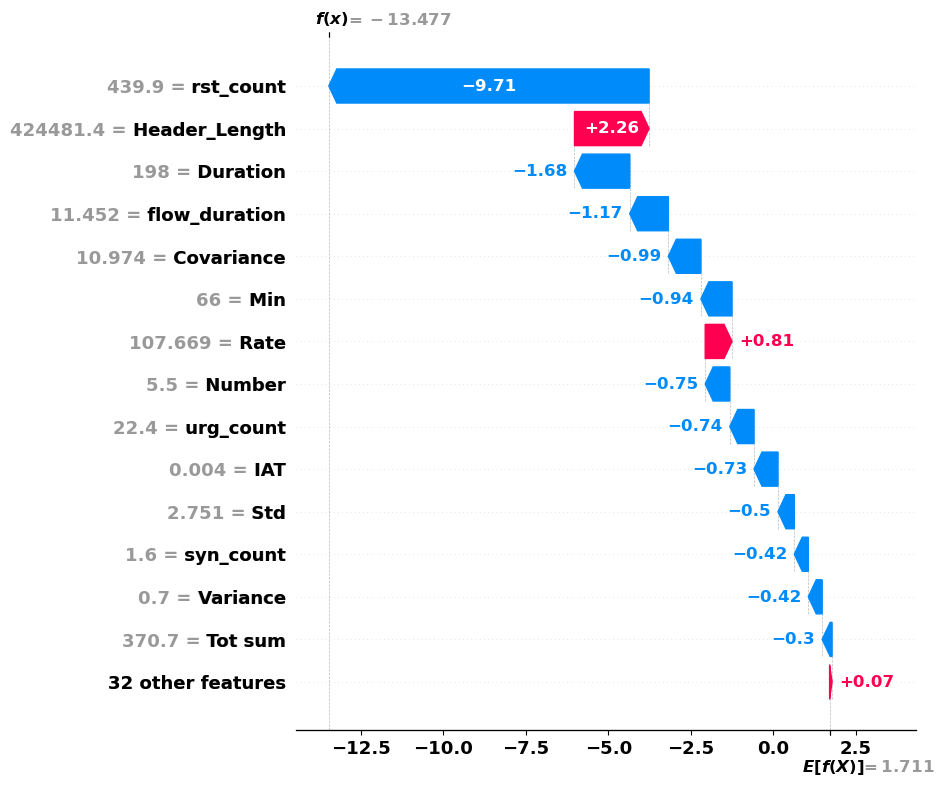

In [43]:
randi = random.randint(0,500)
print(randi)
shap.plots.waterfall(fn_shap_values[181],max_display=15)

281


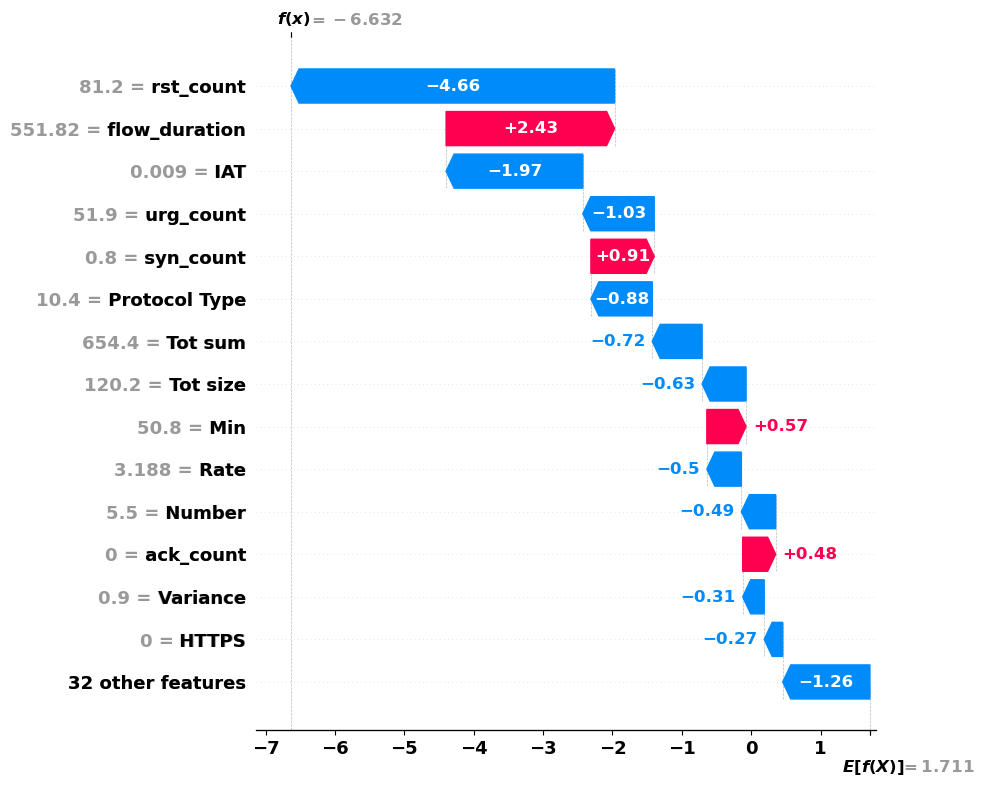

In [44]:
randi = random.randint(0,500)
print(randi)
shap.plots.waterfall(fn_shap_values[400],max_display=15)

375


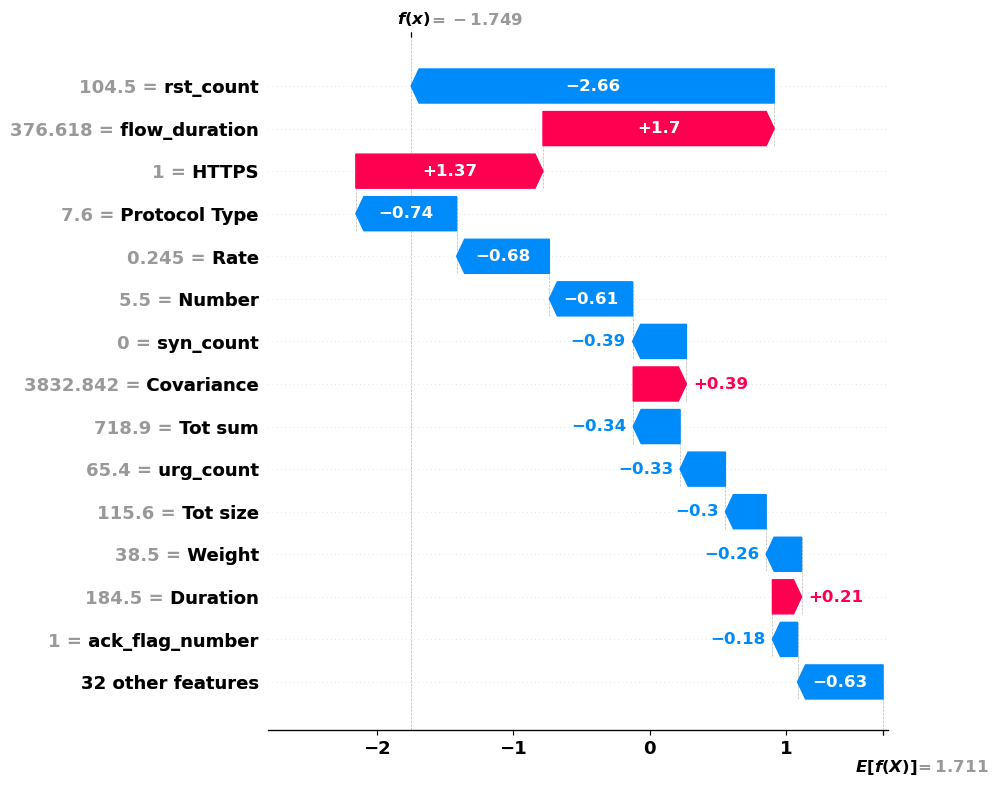

In [45]:
randi = random.randint(0,500)
print(randi)
shap.plots.waterfall(fn_shap_values[171],max_display=15)